In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
class PrepareData:
    """"
    Class to prepare the data in "train_clean.csv" for xgboost, with options for feature engineering and other manipulation.

    class Var:
        df: imported "train_clean.csv", with dates set as index, as datetime objects, and sorted by dates.

    Init Args:
        train_start_date: 'YYYY-MM-DD' format
        val_start_date: 'YYYY-MM-DD' format
        test_start_date: 'YYYY-MM-DD' format
        add_features=None: if True, item_category and an assortment of time-based features are added
        only_normal_shops=False: some shops are not present in "test.csv" and tend to have unusual distributions. if True, exclude these.
        only_normal_items=False: some items are not present in "test.csv". if True, exclude these.

    Methods:
        add_features:
        train_val_test_split:

    """
    df = pd.read_csv("train_clean.csv", index_col=[0], parse_dates=[0], dayfirst=True)
    df = df.sort_index()

    def __init__(self,
                train_start_date,
                val_start_date,
                test_start_date,
                add_features=None,
                only_normal_shops=False,
                only_normal_items=False):

    def add_features(self):
        # get items csv and use id and categories columns as key to add item categories to dataframe
        df['item_category_id'] = df['item_id'].map(items.set_index('item_id')['item_category_id'])

        # add some time features, add the data as a column to do this, remove date at the end
        df['date'] = df.index
        df['dayofweek'] = df['date'].dt.dayofweek
        df['month'] = df['date'].dt.month
        df['year'] = df['date'].dt.year
        df['dayofyear'] = df['date'].dt.dayofyear
        df['dayofmonth'] = df['date'].dt.day

        df.drop(columns='date', inplace=True)
        return df

    def train_val_test_split(self):
        train = df[(train_start_date <= df.index) & df.index < val_start_date].copy()
        validation = df[(val_start_date <= df.index) & (df.index < test_start_date)].copy()
        test = df[test_start_date <= df.index].copy()

    def make_dmatrix(dataframe, add_features=False):
        """
        Convert pandas dataframe to DMatrix for xgboost, splitting off labels as need.
        """
        X = dataframe.copy()
        y = X.pop('item_cnt_day')
        dmatrix = xgb.DMatrix(X, label=y)
        return dmatrix



In [2]:
# import cleaned training data
# convert dates to datetime object, use dates as index, sort by date
df = pd.read_csv("train_clean.csv", index_col=[0], parse_dates=[0], dayfirst=True)

df = df.sort_index()
df.tail()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2015-10-31,33,50,5003,3999.0,1.0
2015-10-31,33,26,3353,3999.0,1.0
2015-10-31,33,50,4872,1499.0,2.0
2015-10-31,33,25,13240,450.0,2.0
2015-10-31,33,19,20949,5.0,2.0


In [3]:
# 2nd to last month (sep 2015) as validation
# last month (oct 2015) as test

val_start_date, test_start_date = '2015-09-01', '2015-10-01'

train = df[df.index < val_start_date].copy()
validation = df[(val_start_date <= df.index) & (df.index < test_start_date)].copy()
test = df[test_start_date <= df.index].copy()



,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-01,0,15,2822,399.00,1.0
2013-01-01,0,54,6595,549.00,1.0
2013-01-01,0,7,16146,1399.00,1.0
2013-01-01,0,7,16170,1999.00,1.0
2013-01-01,0,28,6495,699.00,2.0
...,...,...,...,...,...
2015-08-31,31,31,13720,229.00,1.0
2015-08-31,31,39,20949,5.00,2.0
2015-08-31,31,31,16156,1299.00,1.0


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2015-09-01,32,25,15798,399.0,2.0
2015-09-01,32,19,5823,2799.0,1.0
2015-09-01,32,19,6064,1199.0,1.0
2015-09-01,32,19,6687,299.0,1.0
2015-09-01,32,19,9356,399.0,1.0
...,...,...,...,...,...
2015-09-30,32,24,15805,399.0,1.0
2015-09-30,32,24,15069,2499.0,4.0
2015-09-30,32,24,4181,1290.0,1.0


,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2015-10-01,33,6,4721,3599.0,1.0
2015-10-01,33,6,3917,449.0,1.0
2015-10-01,33,6,7927,3290.0,1.0
2015-10-01,33,6,4181,1290.0,1.0
2015-10-01,33,6,5005,3999.0,1.0
...,...,...,...,...,...
2015-10-31,33,50,5003,3999.0,1.0
2015-10-31,33,26,3353,3999.0,1.0
2015-10-31,33,50,4872,1499.0,2.0


In [15]:
def xgb_data_prepare(dataframe, add_features=False):
    """
    Convert pandas dataframe to DMatrix for xgboost, splitting off labels as need. If feature engineering is enabled, perform this first.
    """
    X = dataframe.copy()
    if add_features:
        X = add_features(X)
    y = X.pop('item_cnt_day')
    dmatrix = xgb.DMatrix(X, label=y)
    return dmatrix


In [5]:
# convert data to format for xgboost
dtrain, dvalidation, dtest = xgb_data_prepare(train), xgb_data_prepare(validation), xgb_data_prepare(test)

In [6]:
# baseline xgboost, model knows nothing about time series except for date_block_num categorical variable

params = {}
params['eval_metric'] = ['rmse', 'mae', 'mape']
params['nthread'] = 4

# track performance on this data
evallist = [(dvalidation, 'eval'), (dtrain, 'train')]

num_boost_round = 100 # how many trees
early_stopping_rounds = 50

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=num_boost_round,
                  evals=evallist,
                  early_stopping_rounds=early_stopping_rounds)



[0]	eval-rmse:6.16047	eval-mae:0.73352	eval-mape:0.35244	train-rmse:2.10190	train-mae:0.53045	train-mape:0.34255


Multiple eval metrics have been passed: 'train-mape' will be used for early stopping.



Will train until train-mape hasn't improved in 50 rounds.


[1]	eval-rmse:6.13974	eval-mae:0.59223	eval-mape:0.22844	train-rmse:2.00562	train-mae:0.38804	train-mape:0.21542


[2]	eval-rmse:6.12840	eval-mae:0.51231	eval-mape:0.15876	train-rmse:1.95522	train-mae:0.30740	train-mape:0.14449


[3]	eval-rmse:6.12320	eval-mae:0.48056	eval-mape:0.13191	train-rmse:1.93404	train-mae:0.28108	train-mape:0.12398


[4]	eval-rmse:6.11833	eval-mae:0.48254	eval-mape:0.13832	train-rmse:1.91555	train-mae:0.28584	train-mape:0.13323


[5]	eval-rmse:6.11219	eval-mae:0.49837	eval-mape:0.15834	train-rmse:1.89745	train-mae:0.29842	train-mape:0.14882


[6]	eval-rmse:6.10132	eval-mae:0.50982	eval-mape:0.17547	train-rmse:1.88046	train-mae:0.31258	train-mape:0.16604


[7]	eval-rmse:6.09198	eval-mae:0.50289	eval-mape:0.17164	train-rmse:1.87220	train-mae:0.32465	train-mape:0.17969


[8]	eval-rmse:6.09361	eval-mae:0.51051	eval-mape:0.18063	train-rmse:1.85198	train-mae:0.33233	train-mape:0.18891


[9]	eval-rmse:6.08974	eval-mae:0.51251	eval-mape:0.18503	train-rmse:1.84694	train-mae:0.33765	train-mape:0.19499


[10]	eval-rmse:6.08747	eval-mae:0.51748	eval-mape:0.19134	train-rmse:1.84153	train-mae:0.34109	train-mape:0.19928


[11]	eval-rmse:6.08735	eval-mae:0.50999	eval-mape:0.18357	train-rmse:1.83778	train-mae:0.34416	train-mape:0.20248


[12]	eval-rmse:6.08709	eval-mae:0.51094	eval-mape:0.18471	train-rmse:1.83453	train-mae:0.34503	train-mape:0.20401


[13]	eval-rmse:6.08412	eval-mae:0.51165	eval-mape:0.18663	train-rmse:1.82987	train-mae:0.34551	train-mape:0.20505


[14]	eval-rmse:6.08328	eval-mae:0.50471	eval-mape:0.18017	train-rmse:1.82638	train-mae:0.34580	train-mape:0.20576


[15]	eval-rmse:6.08263	eval-mae:0.50427	eval-mape:0.18099	train-rmse:1.82385	train-mae:0.34574	train-mape:0.20610


[16]	eval-rmse:6.08173	eval-mae:0.50445	eval-mape:0.18137	train-rmse:1.81345	train-mae:0.34535	train-mape:0.20608


[17]	eval-rmse:6.08119	eval-mae:0.50234	eval-mape:0.17926	train-rmse:1.80966	train-mae:0.34363	train-mape:0.20499


[18]	eval-rmse:6.08223	eval-mae:0.50253	eval-mape:0.17885	train-rmse:1.80758	train-mae:0.34317	train-mape:0.20484


[19]	eval-rmse:6.08256	eval-mae:0.50230	eval-mape:0.17836	train-rmse:1.80402	train-mae:0.34221	train-mape:0.20434


[20]	eval-rmse:6.08159	eval-mae:0.50222	eval-mape:0.17869	train-rmse:1.79762	train-mae:0.34174	train-mape:0.20406


[21]	eval-rmse:6.08161	eval-mae:0.50180	eval-mape:0.17815	train-rmse:1.79293	train-mae:0.34025	train-mape:0.20312


[22]	eval-rmse:6.08025	eval-mae:0.50321	eval-mape:0.18005	train-rmse:1.78859	train-mae:0.33974	train-mape:0.20280


[23]	eval-rmse:6.08194	eval-mae:0.50153	eval-mape:0.17849	train-rmse:1.77513	train-mae:0.33885	train-mape:0.20229


[24]	eval-rmse:6.08196	eval-mae:0.50166	eval-mape:0.17866	train-rmse:1.77480	train-mae:0.33851	train-mape:0.20207


[25]	eval-rmse:6.08200	eval-mae:0.49870	eval-mape:0.17526	train-rmse:1.77134	train-mae:0.33773	train-mape:0.20150


[26]	eval-rmse:6.08172	eval-mae:0.49726	eval-mape:0.17400	train-rmse:1.76908	train-mae:0.33703	train-mape:0.20106


[27]	eval-rmse:6.08203	eval-mae:0.49716	eval-mape:0.17360	train-rmse:1.76739	train-mae:0.33595	train-mape:0.20034


[28]	eval-rmse:6.08268	eval-mae:0.49784	eval-mape:0.17440	train-rmse:1.76576	train-mae:0.33559	train-mape:0.20011


[29]	eval-rmse:6.08173	eval-mae:0.49683	eval-mape:0.17417	train-rmse:1.75701	train-mae:0.33481	train-mape:0.19969


[30]	eval-rmse:6.08171	eval-mae:0.49671	eval-mape:0.17414	train-rmse:1.75654	train-mae:0.33445	train-mape:0.19948


[31]	eval-rmse:6.08171	eval-mae:0.49832	eval-mape:0.17575	train-rmse:1.75130	train-mae:0.33408	train-mape:0.19929


[32]	eval-rmse:6.08277	eval-mae:0.49936	eval-mape:0.17640	train-rmse:1.74560	train-mae:0.33357	train-mape:0.19898


[33]	eval-rmse:6.08267	eval-mae:0.50009	eval-mape:0.17736	train-rmse:1.74227	train-mae:0.33339	train-mape:0.19894


[34]	eval-rmse:6.08265	eval-mae:0.49986	eval-mape:0.17714	train-rmse:1.74105	train-mae:0.33306	train-mape:0.19872


[35]	eval-rmse:6.08251	eval-mae:0.50106	eval-mape:0.17836	train-rmse:1.74042	train-mae:0.33309	train-mape:0.19881


[36]	eval-rmse:6.07912	eval-mae:0.50088	eval-mape:0.17855	train-rmse:1.73770	train-mae:0.33251	train-mape:0.19840


[37]	eval-rmse:6.07948	eval-mae:0.50179	eval-mape:0.17976	train-rmse:1.73564	train-mae:0.33137	train-mape:0.19773


[38]	eval-rmse:6.07941	eval-mae:0.50167	eval-mape:0.17965	train-rmse:1.73501	train-mae:0.33140	train-mape:0.19781


[39]	eval-rmse:6.07934	eval-mae:0.50191	eval-mape:0.18009	train-rmse:1.73456	train-mae:0.33105	train-mape:0.19762


[40]	eval-rmse:6.07930	eval-mae:0.50292	eval-mape:0.18124	train-rmse:1.73336	train-mae:0.33090	train-mape:0.19758


[41]	eval-rmse:6.07941	eval-mae:0.50227	eval-mape:0.18051	train-rmse:1.73137	train-mae:0.33087	train-mape:0.19758


[42]	eval-rmse:6.07968	eval-mae:0.50251	eval-mape:0.18051	train-rmse:1.72979	train-mae:0.33031	train-mape:0.19722


[43]	eval-rmse:6.07964	eval-mae:0.50325	eval-mape:0.18157	train-rmse:1.72603	train-mae:0.32952	train-mape:0.19670


[44]	eval-rmse:6.07945	eval-mae:0.50250	eval-mape:0.18078	train-rmse:1.72387	train-mae:0.32922	train-mape:0.19647


[45]	eval-rmse:6.07936	eval-mae:0.50194	eval-mape:0.18008	train-rmse:1.71700	train-mae:0.32889	train-mape:0.19627


[46]	eval-rmse:6.07877	eval-mae:0.50148	eval-mape:0.18017	train-rmse:1.71466	train-mae:0.32852	train-mape:0.19608


[47]	eval-rmse:6.07875	eval-mae:0.50148	eval-mape:0.18013	train-rmse:1.71269	train-mae:0.32827	train-mape:0.19593


[48]	eval-rmse:6.07875	eval-mae:0.50169	eval-mape:0.18038	train-rmse:1.71251	train-mae:0.32822	train-mape:0.19593


[49]	eval-rmse:6.07875	eval-mae:0.50172	eval-mape:0.18043	train-rmse:1.71178	train-mae:0.32791	train-mape:0.19575


[50]	eval-rmse:6.06046	eval-mae:0.49849	eval-mape:0.17888	train-rmse:1.70781	train-mae:0.32720	train-mape:0.19527


[51]	eval-rmse:6.06072	eval-mae:0.49947	eval-mape:0.17972	train-rmse:1.70378	train-mae:0.32625	train-mape:0.19471


[52]	eval-rmse:6.06092	eval-mae:0.49967	eval-mape:0.17992	train-rmse:1.69780	train-mae:0.32592	train-mape:0.19454


[53]	eval-rmse:6.06090	eval-mae:0.49986	eval-mape:0.18019	train-rmse:1.69676	train-mae:0.32561	train-mape:0.19443


Stopping. Best iteration:
[3]	eval-rmse:6.12320	eval-mae:0.48056	eval-mape:0.13191	train-rmse:1.93404	train-mae:0.28108	train-mape:0.12398



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

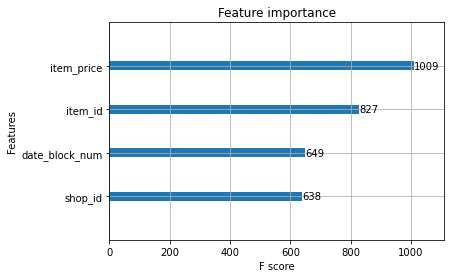

In [15]:
xgb.plot_importance(model)

In [17]:
# add item_categories and more time features

def add_features(df):
    # get items csv and use id and categories columns as key to add item categories to dataframe
    items = pd.read_csv("items.csv")
    df['item_category_id'] = df['item_id'].map(items.set_index('item_id')['item_category_id'])

    # add some time features, add the data as a column to do this, remove date at the end
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day

    df.drop(columns='date', inplace=True)

    return df

# only using 2015's data seems to improve things dramatically
dtrain = xgb_data_prepare(train[train.index >= '2015-01-01'], add_features=add_features)
dvalidation = xgb_data_prepare(validation, add_features=add_features)
dtest = xgb_data_prepare(test, add_features=add_features)


In [65]:
# xgboost with some feature engineering

params = {}
params['eval_metric'] = ['rmse', 'mae', 'mape']
params['nthread'] = 4
params['eta'] = 0.1 # learning rate, default = 0.3

# track performance on this data
evallist = [(dvalidation, 'eval'), (dtrain, 'train')]

num_boost_round = 100 # how many trees
early_stopping_rounds = 10

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=num_boost_round,
                  evals=evallist,
                  early_stopping_rounds=early_stopping_rounds)

[0]	eval-rmse:6.18523	eval-mae:0.87734	eval-mape:0.47828	train-rmse:2.88760	train-mae:0.65814	train-mape:0.46676


Multiple eval metrics have been passed: 'train-mape' will be used for early stopping.



Will train until train-mape hasn't improved in 10 rounds.


[1]	eval-rmse:6.16835	eval-mae:0.81307	eval-mape:0.42327	train-rmse:2.80752	train-mae:0.59507	train-mape:0.41085


[2]	eval-rmse:6.15616	eval-mae:0.75566	eval-mape:0.37379	train-rmse:2.75005	train-mae:0.54105	train-mape:0.36364


[3]	eval-rmse:6.14438	eval-mae:0.70901	eval-mape:0.33448	train-rmse:2.70199	train-mae:0.49628	train-mape:0.32435


[4]	eval-rmse:6.13398	eval-mae:0.66970	eval-mape:0.30161	train-rmse:2.65344	train-mae:0.45628	train-mape:0.28976


[5]	eval-rmse:6.12791	eval-mae:0.63482	eval-mape:0.27195	train-rmse:2.61049	train-mae:0.42153	train-mape:0.25955


[6]	eval-rmse:6.12289	eval-mae:0.60590	eval-mape:0.24771	train-rmse:2.57318	train-mae:0.39211	train-mape:0.23360


[7]	eval-rmse:6.11602	eval-mae:0.58034	eval-mape:0.22616	train-rmse:2.53754	train-mae:0.36565	train-mape:0.21116


[8]	eval-rmse:6.11190	eval-mae:0.55889	eval-mape:0.20824	train-rmse:2.50522	train-mae:0.34178	train-mape:0.19049


[9]	eval-rmse:6.10536	eval-mae:0.54135	eval-mape:0.19437	train-rmse:2.47048	train-mae:0.32118	train-mape:0.17235


[10]	eval-rmse:6.10279	eval-mae:0.52539	eval-mape:0.18067	train-rmse:2.44478	train-mae:0.30538	train-mape:0.15895


[11]	eval-rmse:6.10028	eval-mae:0.51131	eval-mape:0.16892	train-rmse:2.42712	train-mae:0.29085	train-mape:0.14625


[12]	eval-rmse:6.09452	eval-mae:0.50060	eval-mape:0.16083	train-rmse:2.40118	train-mae:0.27808	train-mape:0.13539


[13]	eval-rmse:6.08815	eval-mae:0.48812	eval-mape:0.15085	train-rmse:2.37502	train-mae:0.26866	train-mape:0.12754


[14]	eval-rmse:6.08702	eval-mae:0.48010	eval-mape:0.14387	train-rmse:2.32550	train-mae:0.26227	train-mape:0.12295


[15]	eval-rmse:6.08483	eval-mae:0.47381	eval-mape:0.13954	train-rmse:2.31145	train-mae:0.25869	train-mape:0.12078


[16]	eval-rmse:6.08407	eval-mae:0.46838	eval-mape:0.13483	train-rmse:2.28053	train-mae:0.25539	train-mape:0.11887


[17]	eval-rmse:6.08321	eval-mae:0.46502	eval-mape:0.13245	train-rmse:2.26903	train-mae:0.25533	train-mape:0.11987


[18]	eval-rmse:6.08201	eval-mae:0.46457	eval-mape:0.13308	train-rmse:2.23083	train-mae:0.25586	train-mape:0.12155


[19]	eval-rmse:6.08109	eval-mae:0.46707	eval-mape:0.13634	train-rmse:2.21484	train-mae:0.25795	train-mape:0.12457


[20]	eval-rmse:6.08037	eval-mae:0.46855	eval-mape:0.13864	train-rmse:2.20060	train-mae:0.25958	train-mape:0.12695


[21]	eval-rmse:6.07944	eval-mae:0.46830	eval-mape:0.13926	train-rmse:2.15361	train-mae:0.25996	train-mape:0.12919


[22]	eval-rmse:6.07840	eval-mae:0.47050	eval-mape:0.14227	train-rmse:2.14651	train-mae:0.26306	train-mape:0.13276


[23]	eval-rmse:6.07750	eval-mae:0.47090	eval-mape:0.14349	train-rmse:2.10838	train-mae:0.26484	train-mape:0.13592


[24]	eval-rmse:6.07655	eval-mae:0.47344	eval-mape:0.14670	train-rmse:2.10012	train-mae:0.26824	train-mape:0.13994


[25]	eval-rmse:6.07079	eval-mae:0.47526	eval-mape:0.14950	train-rmse:2.09193	train-mae:0.27050	train-mape:0.14309


[26]	eval-rmse:6.07052	eval-mae:0.47775	eval-mape:0.15231	train-rmse:2.08897	train-mae:0.27299	train-mape:0.14624


Stopping. Best iteration:
[16]	eval-rmse:6.08407	eval-mae:0.46838	eval-mape:0.13483	train-rmse:2.28053	train-mae:0.25539	train-mape:0.11887



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

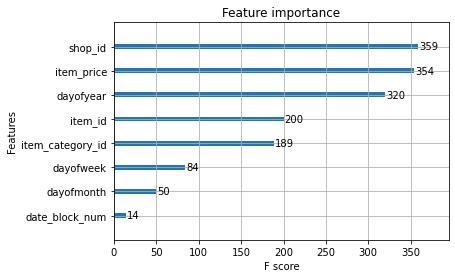

In [51]:
xgb.plot_importance(model)

In [77]:
train

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,dayofweek,month,year,dayofyear,dayofmonth
date,,,,,,,,,,,
2013-01-01,0,15,2822,399.00,1.0,30,1,1,2013,1,1
2013-01-01,0,54,6595,549.00,1.0,25,1,1,2013,1,1
2013-01-01,0,7,16146,1399.00,1.0,64,1,1,2013,1,1
2013-01-01,0,7,16170,1999.00,1.0,64,1,1,2013,1,1
2013-01-01,0,28,6495,699.00,2.0,28,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,31,31,13720,229.00,1.0,69,0,8,2015,243,31
2015-08-31,31,39,20949,5.00,2.0,71,0,8,2015,243,31
2015-08-31,31,31,16156,1299.00,1.0,64,0,8,2015,243,31


<AxesSubplot:xlabel='date'>

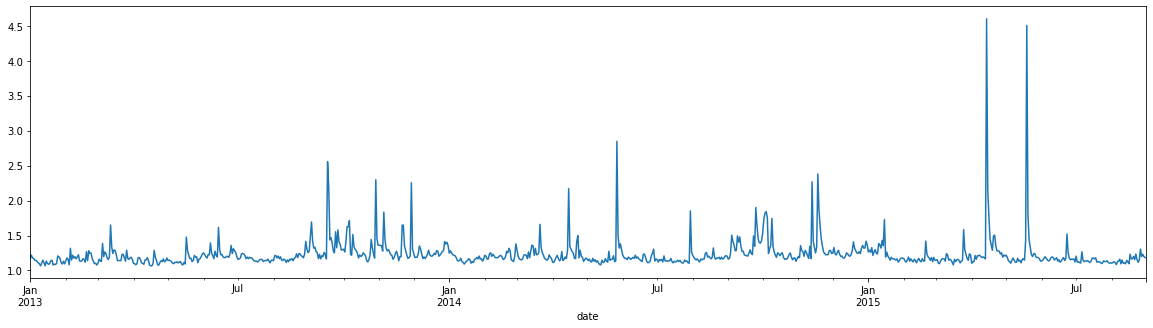

In [85]:
train.groupby('date').item_cnt_day.mean().plot(figsize=(20, 5))

<AxesSubplot:xlabel='date'>

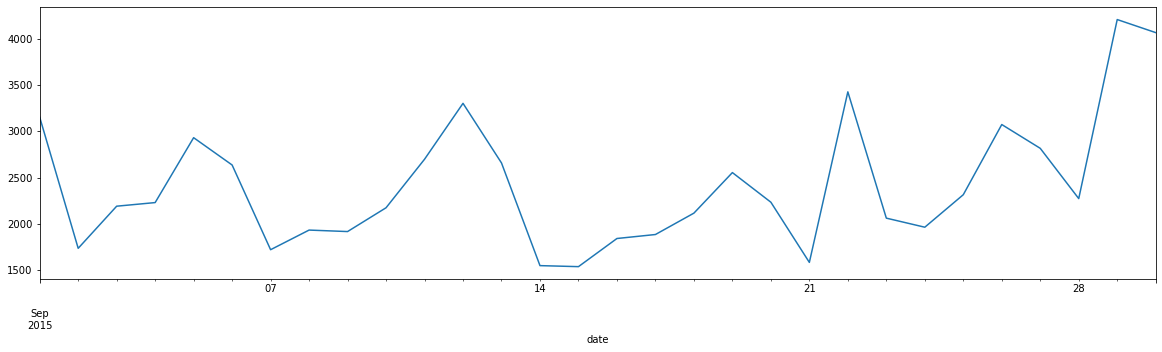

In [108]:

# validation.groupby('date').item_cnt_day.mean().plot(figsize=(20, 5))

validation['item_cnt_day'].groupby('date').sum().plot(figsize=(20, 5))


<AxesSubplot:xlabel='date'>

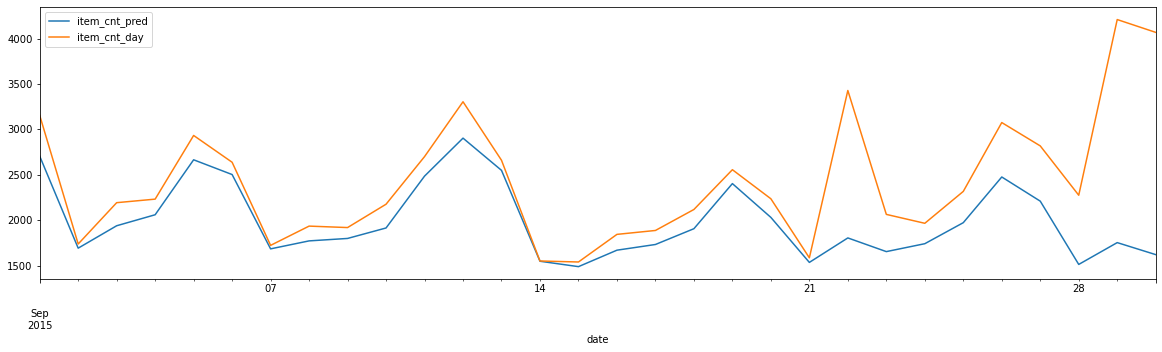

In [10]:
val_predictions = model.predict(dvalidation)
val_predictions
# pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred']).groupby('date').sum().plot(figsize=(20, 5))

# this isn't so bad! the real surprise is why adding time features doesn't seem to make a difference...
val_compare = pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred'])
val_compare['item_cnt_day'] = validation['item_cnt_day']
val_compare.groupby('date').sum().plot(figsize=(20, 5))

In [13]:
# what if we exclude "weird" shops?
df = pd.read_csv("train_clean.csv", index_col=[0], parse_dates=[0], dayfirst=True)

df = df.sort_index()

test = pd.read_csv('test.csv')

# the shops not listed here all seem to have weird behavior towards the end of their time series
# perhaps we should only use the shop id's listed in the following array
test_shops = test['shop_id'].unique()
df = df[df['shop_id'].isin(test_shops)]

train = df[df.index < val_start_date].copy()
validation = df[(val_start_date <= df.index) & (df.index < test_start_date)].copy()
test = df[test_start_date <= df.index].copy()

dtrain, dvalidation, dtest = xgb_data_prepare(train), xgb_data_prepare(validation), xgb_data_prepare(test)

# baseline xgboost + 'weird' shops excluded

params = {}
params['eval_metric'] = ['rmse', 'mae', 'mape']
params['nthread'] = 4

# track performance on this data
evallist = [(dvalidation, 'eval'), (dtrain, 'train')]

num_boost_round = 100 # how many trees
early_stopping_rounds = 50

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=num_boost_round,
                  evals=evallist,
                  early_stopping_rounds=early_stopping_rounds)


[0]	eval-rmse:6.19300	eval-mae:0.73540	eval-mape:0.35067	train-rmse:2.13341	train-mae:0.52836	train-mape:0.34221


Multiple eval metrics have been passed: 'train-mape' will be used for early stopping.



Will train until train-mape hasn't improved in 50 rounds.


[1]	eval-rmse:6.17085	eval-mae:0.59276	eval-mape:0.22655	train-rmse:2.02668	train-mae:0.38587	train-mape:0.21750


[2]	eval-rmse:6.15857	eval-mae:0.50689	eval-mape:0.15127	train-rmse:1.97116	train-mae:0.30464	train-mape:0.14477


[3]	eval-rmse:6.14798	eval-mae:0.48194	eval-mape:0.13473	train-rmse:1.93422	train-mae:0.27586	train-mape:0.12250


[4]	eval-rmse:6.13431	eval-mae:0.47762	eval-mape:0.13721	train-rmse:1.90711	train-mae:0.27889	train-mape:0.13008


[5]	eval-rmse:6.12767	eval-mae:0.49242	eval-mape:0.15670	train-rmse:1.89125	train-mae:0.29138	train-mape:0.14607


[6]	eval-rmse:6.12603	eval-mae:0.49442	eval-mape:0.16037	train-rmse:1.87738	train-mae:0.30672	train-mape:0.16289


[7]	eval-rmse:6.12278	eval-mae:0.50448	eval-mape:0.17231	train-rmse:1.86564	train-mae:0.31761	train-mape:0.17573


[8]	eval-rmse:6.12177	eval-mae:0.51190	eval-mape:0.18110	train-rmse:1.85505	train-mae:0.32547	train-mape:0.18482


[9]	eval-rmse:6.12112	eval-mae:0.51639	eval-mape:0.18628	train-rmse:1.85117	train-mae:0.33106	train-mape:0.19128


[10]	eval-rmse:6.12032	eval-mae:0.50853	eval-mape:0.17832	train-rmse:1.83615	train-mae:0.33442	train-mape:0.19547


[11]	eval-rmse:6.11525	eval-mae:0.50871	eval-mape:0.18002	train-rmse:1.82281	train-mae:0.33586	train-mape:0.19759


[12]	eval-rmse:6.11364	eval-mae:0.51084	eval-mape:0.18259	train-rmse:1.81900	train-mae:0.33733	train-mape:0.19958


[13]	eval-rmse:6.11356	eval-mae:0.51131	eval-mape:0.18326	train-rmse:1.81642	train-mae:0.33769	train-mape:0.20040


[14]	eval-rmse:6.11452	eval-mae:0.50953	eval-mape:0.18168	train-rmse:1.80428	train-mae:0.33723	train-mape:0.20054


[15]	eval-rmse:6.11428	eval-mae:0.50907	eval-mape:0.18158	train-rmse:1.80193	train-mae:0.33632	train-mape:0.20028


[16]	eval-rmse:6.11322	eval-mae:0.50314	eval-mape:0.17571	train-rmse:1.80082	train-mae:0.33658	train-mape:0.20074


[17]	eval-rmse:6.11322	eval-mae:0.50385	eval-mape:0.17646	train-rmse:1.79605	train-mae:0.33679	train-mape:0.20112


[18]	eval-rmse:6.11317	eval-mae:0.50331	eval-mape:0.17594	train-rmse:1.79517	train-mae:0.33625	train-mape:0.20087


[19]	eval-rmse:6.11244	eval-mae:0.50441	eval-mape:0.17734	train-rmse:1.78930	train-mae:0.33575	train-mape:0.20060


[20]	eval-rmse:6.11226	eval-mae:0.50400	eval-mape:0.17721	train-rmse:1.78855	train-mae:0.33504	train-mape:0.20019


[21]	eval-rmse:6.11223	eval-mae:0.50446	eval-mape:0.17772	train-rmse:1.78506	train-mae:0.33501	train-mape:0.20022


[22]	eval-rmse:6.11125	eval-mae:0.50351	eval-mape:0.17719	train-rmse:1.78077	train-mae:0.33433	train-mape:0.19988


[23]	eval-rmse:6.11126	eval-mae:0.50370	eval-mape:0.17739	train-rmse:1.77873	train-mae:0.33434	train-mape:0.19994


[24]	eval-rmse:6.11137	eval-mae:0.50469	eval-mape:0.17845	train-rmse:1.77360	train-mae:0.33328	train-mape:0.19929


[25]	eval-rmse:6.11139	eval-mae:0.50408	eval-mape:0.17778	train-rmse:1.77229	train-mae:0.33219	train-mape:0.19861


[26]	eval-rmse:6.11256	eval-mae:0.50557	eval-mape:0.17899	train-rmse:1.77059	train-mae:0.33181	train-mape:0.19838


[27]	eval-rmse:6.11237	eval-mae:0.50589	eval-mape:0.17937	train-rmse:1.76647	train-mae:0.33148	train-mape:0.19817


[28]	eval-rmse:6.11210	eval-mae:0.50536	eval-mape:0.17902	train-rmse:1.75949	train-mae:0.33001	train-mape:0.19723


[29]	eval-rmse:6.11210	eval-mae:0.50545	eval-mape:0.17916	train-rmse:1.75833	train-mae:0.32953	train-mape:0.19689


[30]	eval-rmse:6.09682	eval-mae:0.50182	eval-mape:0.17815	train-rmse:1.75211	train-mae:0.32841	train-mape:0.19601


[31]	eval-rmse:6.09778	eval-mae:0.50164	eval-mape:0.17741	train-rmse:1.74438	train-mae:0.32795	train-mape:0.19576


[32]	eval-rmse:6.09810	eval-mae:0.50343	eval-mape:0.17934	train-rmse:1.74181	train-mae:0.32702	train-mape:0.19517


[33]	eval-rmse:6.09807	eval-mae:0.50402	eval-mape:0.18008	train-rmse:1.74152	train-mae:0.32687	train-mape:0.19518


[34]	eval-rmse:6.09810	eval-mae:0.50249	eval-mape:0.17844	train-rmse:1.73647	train-mae:0.32665	train-mape:0.19514


[35]	eval-rmse:6.09899	eval-mae:0.50334	eval-mape:0.17912	train-rmse:1.73223	train-mae:0.32606	train-mape:0.19467


[36]	eval-rmse:6.09900	eval-mae:0.50337	eval-mape:0.17916	train-rmse:1.73077	train-mae:0.32599	train-mape:0.19465


[37]	eval-rmse:6.09887	eval-mae:0.50369	eval-mape:0.17961	train-rmse:1.72941	train-mae:0.32584	train-mape:0.19456


[38]	eval-rmse:6.09984	eval-mae:0.50330	eval-mape:0.17913	train-rmse:1.72545	train-mae:0.32535	train-mape:0.19418


[39]	eval-rmse:6.09797	eval-mae:0.50262	eval-mape:0.17913	train-rmse:1.72128	train-mae:0.32487	train-mape:0.19385


[40]	eval-rmse:6.09781	eval-mae:0.50295	eval-mape:0.17954	train-rmse:1.72014	train-mae:0.32442	train-mape:0.19352


[41]	eval-rmse:6.08340	eval-mae:0.50350	eval-mape:0.18115	train-rmse:1.71763	train-mae:0.32368	train-mape:0.19316


[42]	eval-rmse:6.08114	eval-mae:0.50249	eval-mape:0.18061	train-rmse:1.71101	train-mae:0.32327	train-mape:0.19289


[43]	eval-rmse:6.08113	eval-mae:0.50328	eval-mape:0.18157	train-rmse:1.70606	train-mae:0.32305	train-mape:0.19287


[44]	eval-rmse:6.08113	eval-mae:0.50288	eval-mape:0.18114	train-rmse:1.70423	train-mae:0.32269	train-mape:0.19266


[45]	eval-rmse:6.08090	eval-mae:0.50287	eval-mape:0.18138	train-rmse:1.70351	train-mae:0.32245	train-mape:0.19258


[46]	eval-rmse:6.08090	eval-mae:0.50288	eval-mape:0.18138	train-rmse:1.70325	train-mae:0.32240	train-mape:0.19256


[47]	eval-rmse:6.08084	eval-mae:0.50317	eval-mape:0.18172	train-rmse:1.70120	train-mae:0.32201	train-mape:0.19237


[48]	eval-rmse:6.08193	eval-mae:0.50276	eval-mape:0.18115	train-rmse:1.69984	train-mae:0.32197	train-mape:0.19245


[49]	eval-rmse:6.08231	eval-mae:0.50247	eval-mape:0.18036	train-rmse:1.69450	train-mae:0.32137	train-mape:0.19213


[50]	eval-rmse:6.08191	eval-mae:0.50252	eval-mape:0.18061	train-rmse:1.69388	train-mae:0.32121	train-mape:0.19209


[51]	eval-rmse:6.08024	eval-mae:0.50214	eval-mape:0.18076	train-rmse:1.68878	train-mae:0.32102	train-mape:0.19201


[52]	eval-rmse:6.08025	eval-mae:0.50274	eval-mape:0.18155	train-rmse:1.68796	train-mae:0.32091	train-mape:0.19205


[53]	eval-rmse:6.08024	eval-mae:0.50277	eval-mape:0.18159	train-rmse:1.68703	train-mae:0.32054	train-mape:0.19186


Stopping. Best iteration:
[3]	eval-rmse:6.14798	eval-mae:0.48194	eval-mape:0.13473	train-rmse:1.93422	train-mae:0.27586	train-mape:0.12250



<AxesSubplot:xlabel='date'>

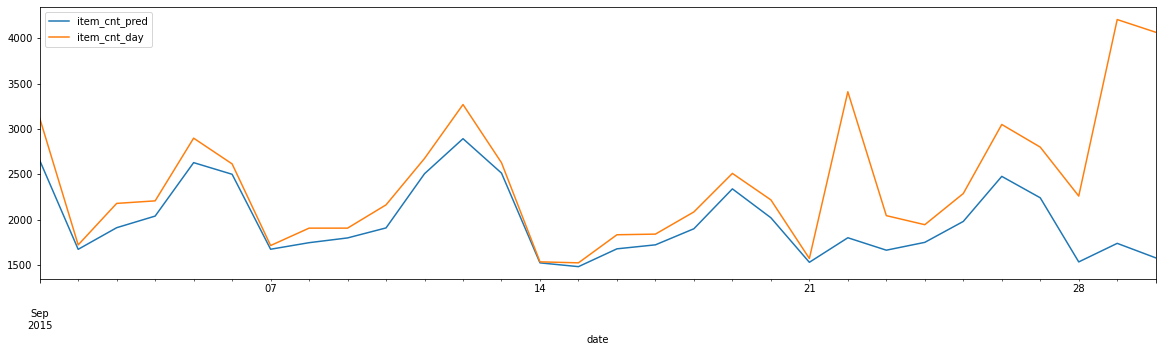

In [14]:
val_predictions = model.predict(dvalidation)
val_predictions
# pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred']).groupby('date').sum().plot(figsize=(20, 5))

# this isn't so bad! the real surprise is why adding time features doesn't seem to make a difference...
val_compare = pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred'])
val_compare['item_cnt_day'] = validation['item_cnt_day']
val_compare.groupby('date').sum().plot(figsize=(20, 5))

In [1]:

# what if we exclude "weird" shops and use additional features?
df = pd.read_csv("train_clean.csv", index_col=[0], parse_dates=[0], dayfirst=True)

df = df.sort_index()

test_df = pd.read_csv('test.csv')

# the shops not listed here all seem to have weird behavior towards the end of their time series
# perhaps we should only use the shop id's listed in the following array
test_shops = test['shop_id'].unique()
df = df[df['shop_id'].isin(test_shops)]

train = df[df.index < val_start_date].copy()
validation = df[(val_start_date <= df.index) & (df.index < test_start_date)].copy()
test = df[test_start_date <= df.index].copy()

# only using 2015's data seems to improve things dramatically
dtrain = xgb_data_prepare(train[train.index >= '2015-01-01'], add_features=add_features)

dtrain = xgb_data_prepare(train, add_features=add_features)
dvalidation = xgb_data_prepare(validation, add_features=add_features)
dtest = xgb_data_prepare(test, add_features=add_features)

# baseline xgboost + 'weird' shops excluded

params = {}
params['eval_metric'] = ['mae', 'mape', 'rmse'] # last metric is used for early stopping
params['nthread'] = 4
params['eta'] = 1 # learning rate, default = 0.3
params['max_depth'] = 6 # default = 6

# gpu (needs CUDA compute >= 3.5)
# params['gpu_id'] = 0
# params['tree_method'] = 'gpu_hist'

# track performance on this data
evallist = [(dvalidation, 'eval'), (dtrain, 'train')]

num_boost_round = 200 # how many trees, default = 10
early_stopping_rounds = 10

model = xgb.train(params=params,
                  dtrain=dtrain,
                  num_boost_round=num_boost_round,
                  evals=evallist,
                  early_stopping_rounds=early_stopping_rounds)

NameError: name 'pd' is not defined

In [45]:
test_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


<AxesSubplot:xlabel='date'>

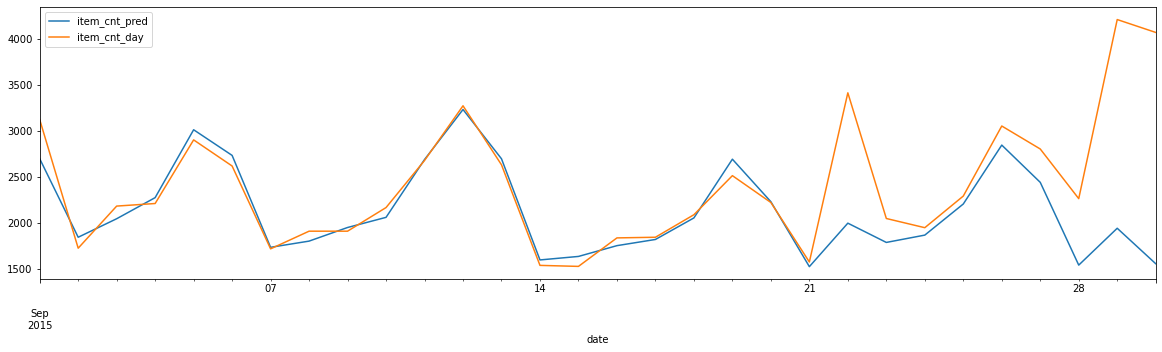

In [49]:
# predict using the best iteration's values
val_predictions = model.predict(dvalidation, ntree_limit=model.best_ntree_limit)

# pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred']).groupby('date').sum().plot(figsize=(20, 5))

# this isn't so bad! the real surprise is why adding time features doesn't seem to make a difference...
val_compare = pd.DataFrame(data=val_predictions, index=validation.index, columns=['item_cnt_pred'])
val_compare['item_cnt_day'] = validation['item_cnt_day']
val_compare.groupby('date').sum().plot(figsize=(20, 5))